# ANANT KUMAR TIWARI
# 211112230

### importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Decision Tree for Play Tennis

In [28]:
col_names = ['outlook', 'temp', 'humidity', 'windy', 'play']
data = pd.read_csv("PlayTennis.csv", skiprows=1, header=None, names=col_names)

In [29]:
array= np.array(data.columns.values)
array[0]

'outlook'

In [30]:
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


# Encoding the column

In [32]:
Le = LabelEncoder()

# data['outlook'] = Le.fit_transform(data['outlook'])
# data['temp'] = Le.fit_transform(data['temp'])
# data['humidity'] = Le.fit_transform(data['humidity'])
# data['windy'] = Le.fit_transform(data['windy'])
# data['play'] = Le.fit_transform(data['play'])

for i in range(len(array)):
    data[array[i]]=Le.fit_transform(data[array[i]])
# data[array]=Le.fit_transform(data[array])

In [33]:
data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [4]:
X= data.iloc[:,:-1]
y= data.iloc[:,-1]

In [17]:
X

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


# Building and Training the model 
### using entropy

In [5]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

[Text(0.4, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'x[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

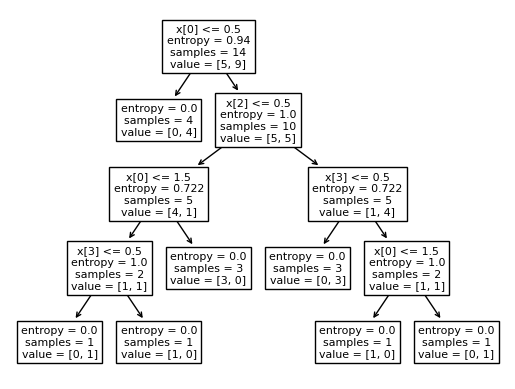

In [6]:
tree.plot_tree(clf)

In [7]:
y_pred = clf.predict(X)

In [8]:
y_pred == y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool

# calculating the accuracy
### using entropy

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y)

1.0

# Using Gini index

In [10]:
clf2 = tree.DecisionTreeClassifier(criterion = 'gini')
clf2 = clf2.fit(X, y)

[Text(0.4, 0.9, 'x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'x[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'x[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'x[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

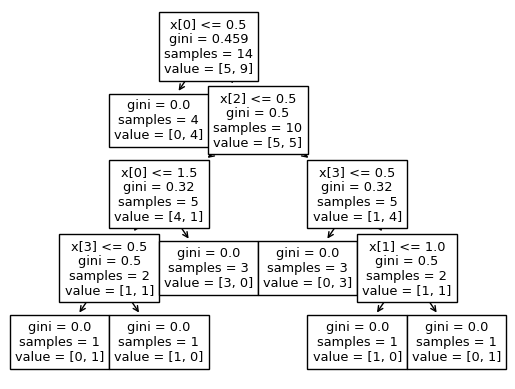

In [11]:
tree.plot_tree(clf2)

In [12]:
y_pred = clf2.predict(X)
y==y_pred

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y)

1.0